# Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("heart.csv")

In [100]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data PreProcessing

In [101]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [103]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Data Splitting and visvalization

In [104]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous = ["age","trtbps","chol","thalachh","oldpeak"]

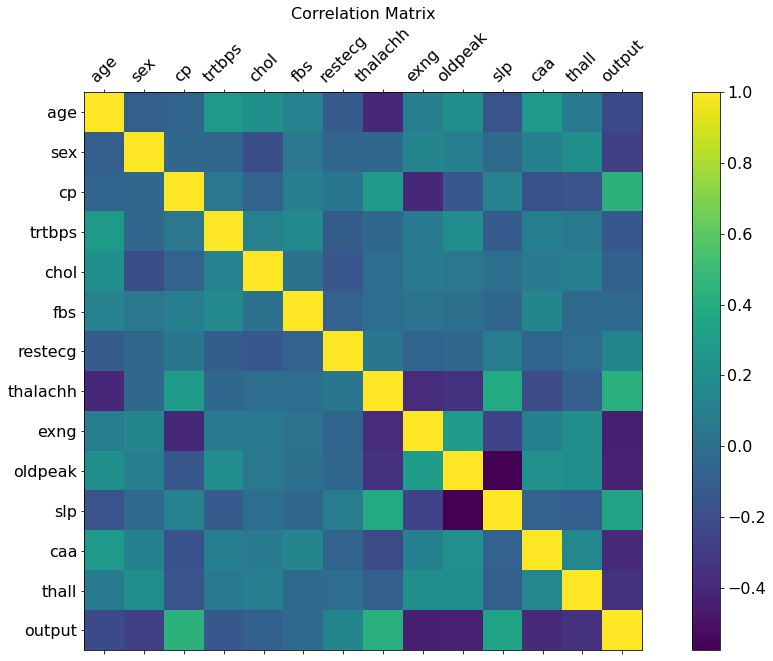

In [105]:
f = plt.figure(figsize=(18, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=16, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

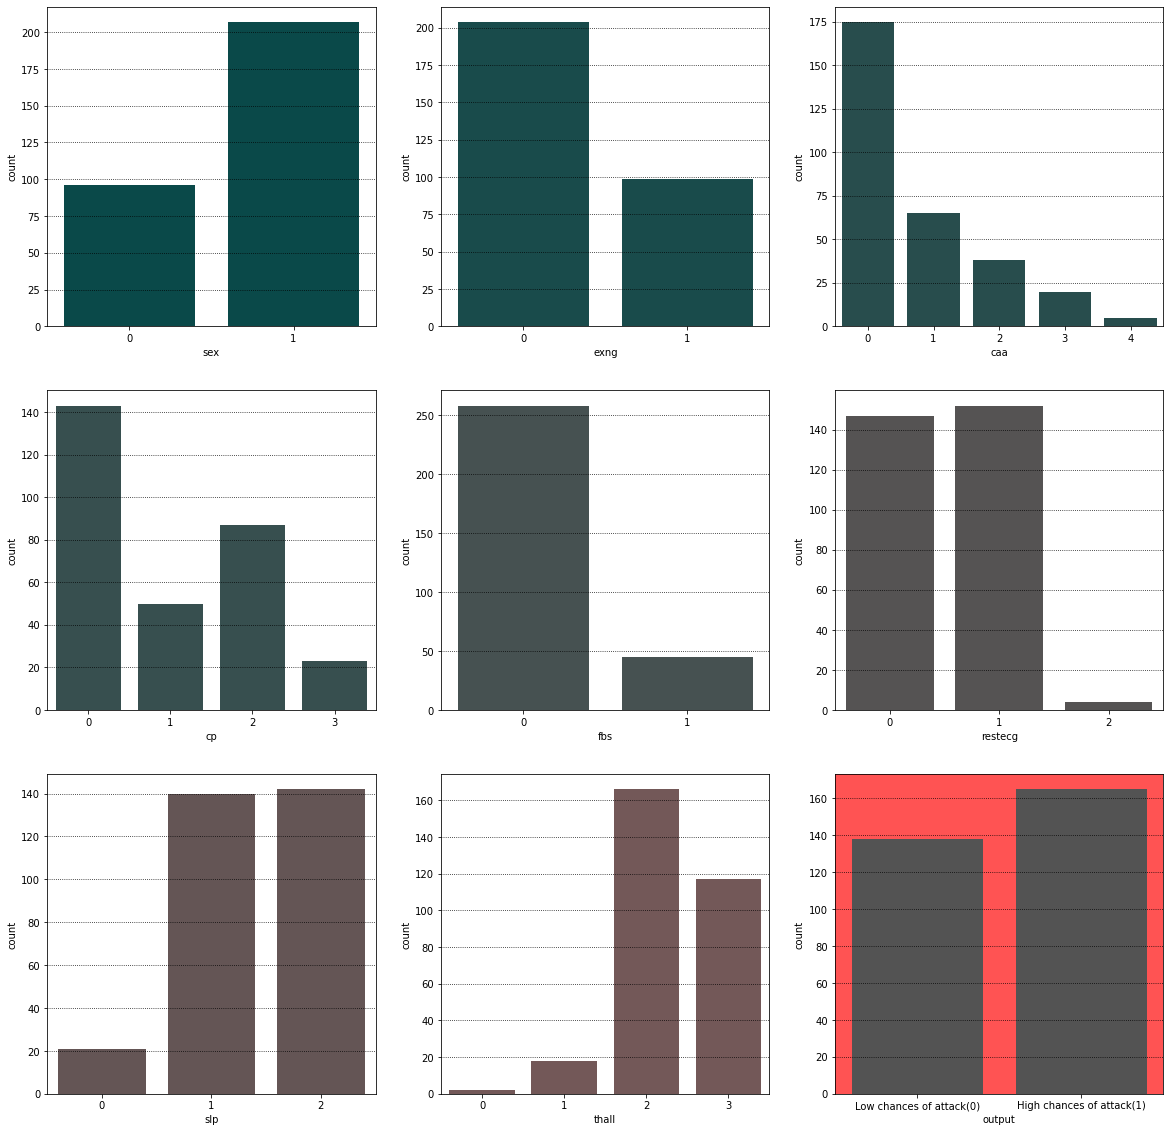

In [106]:
fig = plt.figure(figsize=(20,20))

gr = fig.add_gridspec(3,3)

ax0 = fig.add_subplot(gr[0,0])
ax1 = fig.add_subplot(gr[0,1])
ax2 = fig.add_subplot(gr[0,2])
ax3 = fig.add_subplot(gr[1,0])
ax4 = fig.add_subplot(gr[1,1])
ax5 = fig.add_subplot(gr[1,2])
ax6 = fig.add_subplot(gr[2,0])
ax7 = fig.add_subplot(gr[2,1])
ax8 = fig.add_subplot(gr[2,2])

axxes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for i in range(0,len(categorical)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.countplot(ax=axxes[i],data=df,x=df[categorical[i]],palette=["#"+str(i)+str(i)+"5353"]) #so that the figures change colors in each cycle
#NOT: if str(i) is greater than 9 it will throw an error, be careful
    
#ax8 is target colon 
ax8.grid(color='#000000', linestyle=':', axis='y')
sns.countplot(ax=ax8,data=df,x=df["output"],palette=["#53535353"])
ax8.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
ax8.set_facecolor("#FF5353") 

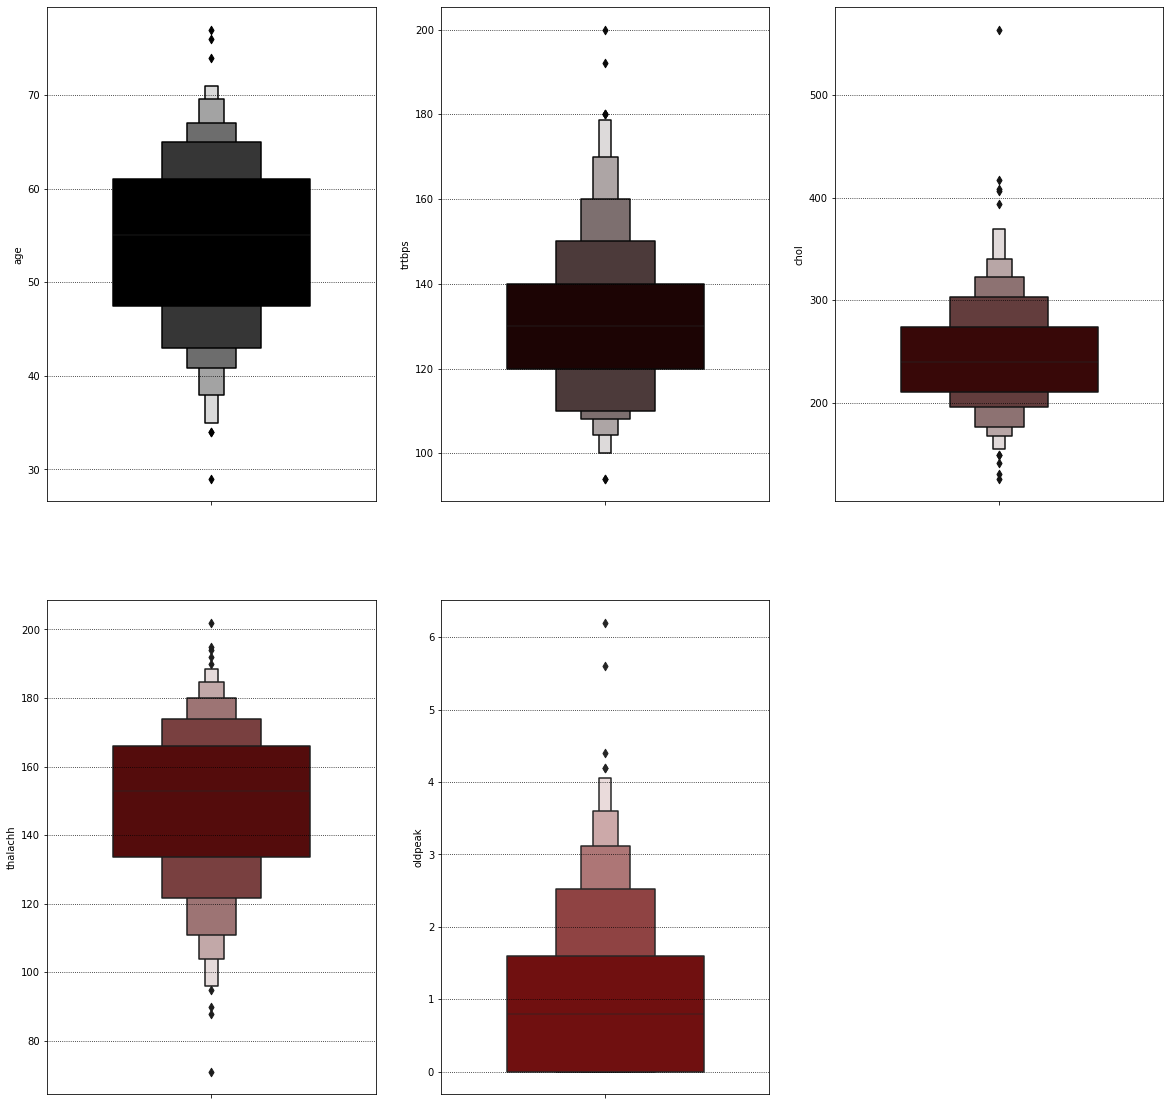

In [108]:
fig = plt.figure(figsize=(20,20))

gr = fig.add_gridspec(2,3)

ax0 = fig.add_subplot(gr[0,0])
ax1 = fig.add_subplot(gr[0,1])
ax2 = fig.add_subplot(gr[0,2])
ax3 = fig.add_subplot(gr[1,0])
ax4 = fig.add_subplot(gr[1,1])
axxes = [ax0,ax1,ax2,ax3,ax4]

for i in range(0,len(continous)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.boxenplot(ax=axxes[i],y=df[continous[i]],palette=["#"+str(i*2)+"00000"],width=0.6)


# Training and Testing Data

In [109]:
X = df.iloc[:,:-1]
Y = pd.DataFrame(df["output"])
print("Shape of X:",X.shape,"\nShape of Y:",Y.shape)

Shape of X: (303, 13) 
Shape of Y: (303, 1)


In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 53)

In [112]:
print("Shape of x train:",x_train.shape,"\nShape of y train:", y_train.shape)
print("Shape of x test:",x_test.shape,"\nShape of y test:", y_test.shape)

Shape of x train: (257, 13) 
Shape of y train: (257, 1)
Shape of x test: (46, 13) 
Shape of y test: (46, 1)


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling

# Support Vector Machine(SVM)

In [115]:
from sklearn.svm import SVC
model= SVC().fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Your SVM accuracy score: ",acc)

Your SVM accuracy score:  0.8695652173913043


# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Your Logistic Regression score: ",acc)

Your Logistic Regression score:  0.8695652173913043


# Using NaiveBayes(Gaussian and Bernoulli)

In [118]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB().fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Your Naive Bayes score using gaussian NB: ",acc)


from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB().fit(x_train,y_train)
y_pred=model.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
print("Your Naive Bayes score using Bernoulli NB: ",acc1)

Your Naive Bayes score using gaussian NB:  0.8695652173913043
Your Naive Bayes score using Bernoulli NB:  0.9565217391304348
